In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from importlib import reload

# DBSCAN import
from sklearn.cluster import DBSCAN
# Scaler import
from sklearn.preprocessing import MinMaxScaler

# import modules
import src.wrangle as wr

# define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
df = wr.get_logs()

In [4]:
df.head()

,date_time,date,page,id,cohort,ip,cohort_name,topic,lesson,Topic,Lesson,full_lesson_name,field
0,2018-01-26 09:55:03,2018-01-26,index,1,8,97.105.19.61,Hampton,index,index,index,index,index,WebDev
1,2018-01-26 09:56:02,2018-01-26,java-ii,1,8,97.105.19.61,Hampton,java-ii,java-ii,java-ii,java-ii,java-ii,WebDev
2,2018-01-26 09:56:05,2018-01-26,java-ii/object-oriented-programming,1,8,97.105.19.61,Hampton,java-ii,object-oriented-programming,java-ii,object-oriented-programming,java-ii object-oriented-programming,WebDev
3,2018-01-26 09:56:06,2018-01-26,slides/object_oriented_programming,1,8,97.105.19.61,Hampton,slides,object_oriented_programming,slides,object_oriented_programming,slides object_oriented_programming,WebDev
4,2018-01-26 09:56:24,2018-01-26,javascript-i/conditionals,2,22,97.105.19.61,Teddy,javascript-i,conditionals,javascript-i,conditionals,javascript-i conditionals,WebDev


##### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [188]:
get_top_lessons(df)

,full_lesson_name,total_page
0,spring fundamentals,36271
1,html-css css-i,32875
2,javascript-i introduction,25163
3,html-css css-ii,21002
4,search search_index.json,19519


In [212]:
ds = df[df.field == 'DS']
wd = df[df.field == 'WebDev']

In [25]:
df.field.unique()

['WebDev', 'No Name', 'Staff', 'DS']
Categories (4, object): ['DS', 'No Name', 'Staff', 'WebDev']

In [175]:
def top_lessons_df():
    popular_lessons = \
        pd.concat([get_top_lessons(df, 'total', 5), get_top_lessons(ds, 'DS', 5), get_top_lessons(wd, 'WD', 5)], axis=1)
    display(popular_lessons)

In [176]:
top_lessons_df()

,full_lesson_name,total_page,full_lesson_name,DS_page,full_lesson_name,WD_page
0,spring fundamentals,36271,search search_index.json,2203,spring fundamentals,30931
1,html-css css-i,32875,classification overview,1785,html-css css-i,29391
2,javascript-i introduction,25163,1-fundamentals modern-data-scientist.jpg,1655,javascript-i introduction,23232
3,html-css css-ii,21002,1-fundamentals AI-ML-DL-timeline.jpg,1651,html-css css-ii,19291
4,search search_index.json,19519,1-fundamentals 1.1-intro-to-data-science,1633,toc,16669


In [178]:
popular_lessons = \
    pd.concat([ get_top_lessons(ds, 'DS', 5), get_top_lessons(wd, 'WD', 5)], axis=1)

In [179]:
popular_lessons

,full_lesson_name,DS_page,full_lesson_name,WD_page
0,search search_index.json,2203,spring fundamentals,30931
1,classification overview,1785,html-css css-i,29391
2,1-fundamentals modern-data-scientist.jpg,1655,javascript-i introduction,23232
3,1-fundamentals AI-ML-DL-timeline.jpg,1651,html-css css-ii,19291
4,1-fundamentals 1.1-intro-to-data-science,1633,toc,16669


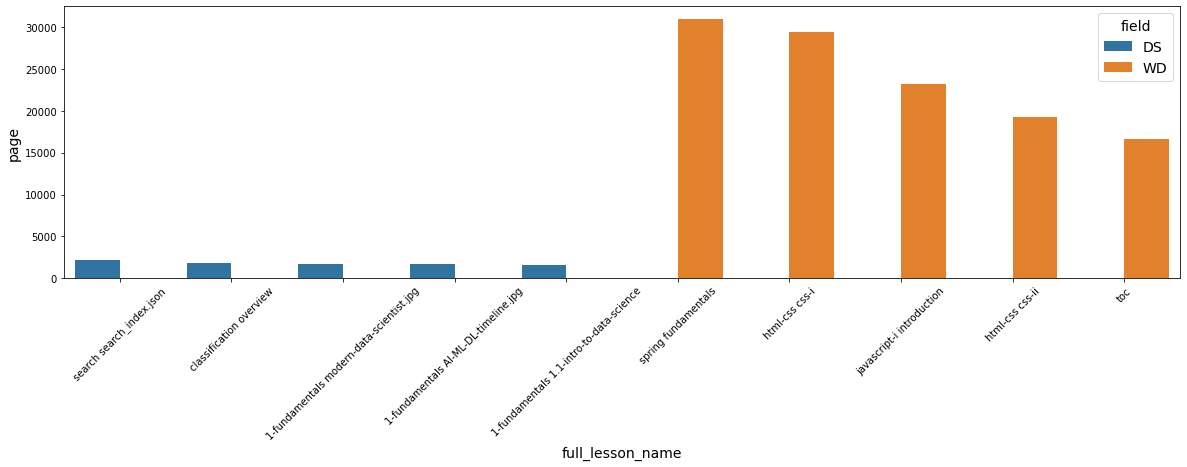

In [187]:
viz_top_lessons()

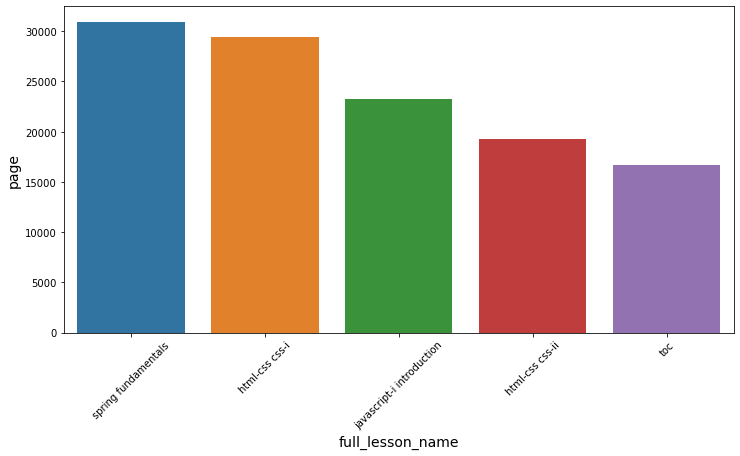

In [195]:
viz_top_lessons_dev()

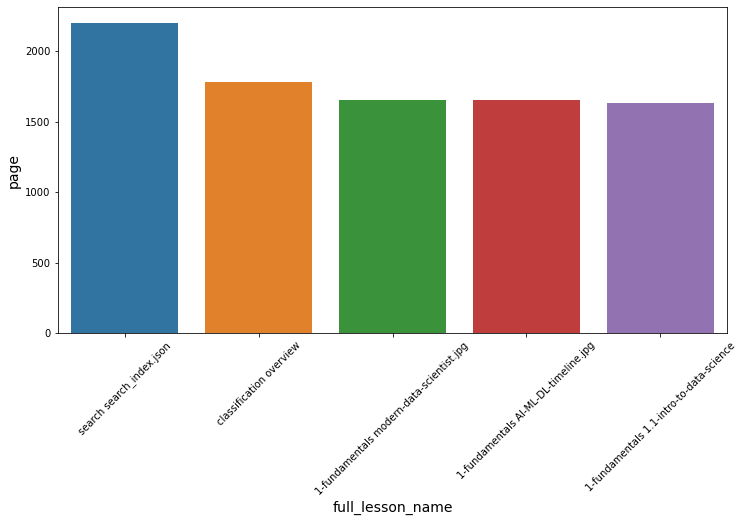

In [196]:
viz_top_lessons_ds()

In [194]:
def viz_top_lessons_ds():
    popular_lessons2 = get_top_lessons(ds, 'DS', 5, viz=True)
                              
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=popular_lessons2, x='full_lesson_name', y='page')
    plt.xticks(rotation=45)
    plt.show()

In [193]:
def viz_top_lessons_dev():
    popular_lessons2 = get_top_lessons(wd, 'WD', 5, viz=True)
                              
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=popular_lessons2, x='full_lesson_name', y='page')
    plt.xticks(rotation=45)
    plt.show()

In [186]:
def viz_top_lessons():
    popular_lessons2 = pd.concat([ #get_top_lessons(df, 'total', 5, viz=True), \
                              get_top_lessons(ds, 'DS', 5, viz=True),\
                              get_top_lessons(wd, 'WD', 5, viz=True)],\
                              axis=0, ignore_index=True)
    plt.figure(figsize=(20, 5))
    ax = sns.barplot(data=popular_lessons2, x='full_lesson_name', y='page', hue='field')
    plt.xticks(rotation=45)
    plt.show()

In [183]:
popular_lessons2 = pd.concat([ #get_top_lessons(df, 'total', 5, viz=True), \
                              get_top_lessons(ds, 'DS', 5, viz=True),\
                              get_top_lessons(wd, 'WD', 5, viz=True)],\
                              axis=0, ignore_index=True)

In [184]:
popular_lessons2

,full_lesson_name,page,field
0,search search_index.json,2203,DS
1,classification overview,1785,DS
2,1-fundamentals modern-data-scientist.jpg,1655,DS
3,1-fundamentals AI-ML-DL-timeline.jpg,1651,DS
4,1-fundamentals 1.1-intro-to-data-science,1633,DS
5,spring fundamentals,30931,WD
6,html-css css-i,29391,WD
7,javascript-i introduction,23232,WD
8,html-css css-ii,19291,WD
9,toc,16669,WD


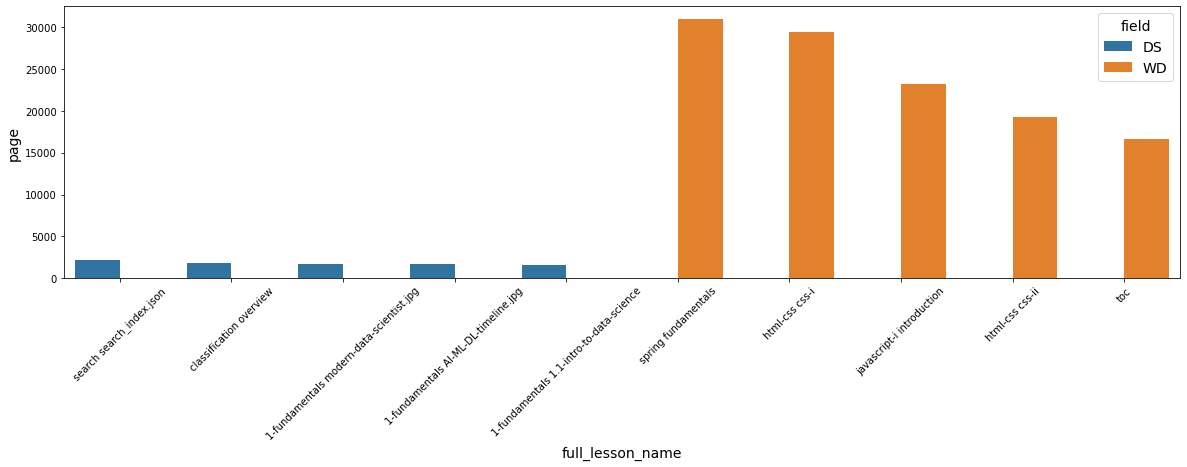

In [185]:
plt.figure(figsize=(20, 5))
ax = sns.barplot(data=popular_lessons2, x='full_lesson_name', y='page', hue='field')
plt.xticks(rotation=45)
plt.show()

##### 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [259]:
df[~(df.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index().head(50).sort_values(by=['full_lesson_name', 'page'])

,full_lesson_name,cohort_name,page
39,appendix,Staff,1288
41,html-css,Staff,1284
48,html-css css-i,Kalypso,1154
40,html-css css-i,No Name,1285
37,html-css css-i,Zion,1297
35,html-css css-i,Jupiter,1341
28,html-css css-i,Marco,1416
20,html-css css-i,Hyperion,1574
16,html-css css-i,Apex,1663
11,html-css css-i,Ganymede,1862


In [245]:
count_lessons_ds.full_lesson_name.head(20)

0                            classification overview
1           classification scale_features_or_not.svg
2                                 sql mysql-overview
3                           search search_index.json
4           1-fundamentals modern-data-scientist.jpg
5               1-fundamentals AI-ML-DL-timeline.jpg
6           1-fundamentals 1.1-intro-to-data-science
7             fundamentals modern-data-scientist.jpg
8                 fundamentals AI-ML-DL-timeline.jpg
9                 fundamentals intro-to-data-science
10    anomaly-detection AnomalyDetectionCartoon.jpeg
11                           6-regression 1-overview
12                        anomaly-detection overview
13                          search search_index.json
14                          search search_index.json
15                           6-regression 1-overview
16                                      appendix cli
17          1-fundamentals modern-data-scientist.jpg
18              1-fundamentals AI-ML-DL-timeli

In [255]:
count_lessons_ds = ds[~(ds.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index()
count_topics_ds = ds[~(ds.full_lesson_name=='index')].groupby(['topic','cohort_name'])
count_lessons_ds[count_lessons_ds.full_lesson_name == 'classification overview']
count_lessons_ds.groupby('')

0       28534
1         258
2         136
3          69
4          60
        ...  
238         1
223         1
221         1
220         1
1109        1
Name: page, Length: 274, dtype: int64

In [165]:
def cohort_ds_lesson():
    count_lessons_ds = ds[~(ds.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
        page.count().sort_values(ascending=False).reset_index()
    count_topics_ds = ds[~(ds.full_lesson_name=='index')].groupby(['topic','cohort_name']).\
        page.count().sort_values(ascending=False).reset_index()
    print('DATA SCIENCE COHORTS')
    print('--------------------')
    print('FULL LESSON NAME')
    display(count_lessons_ds.head(5))
    print()    
    
    print('CHAPTER NAME')
    display(count_topics_ds.head(5))
    print()

In [306]:
count_lessons_ds = ds[~(ds.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index()
count_topics_ds = ds[~(ds.full_lesson_name=='index')].groupby(['topic','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index()
#count_lessons_wd[count_lessons_wd.full_lesson_name == 'spring fundamentals']
count_lessons_ds = count_lessons_ds.set_index('cohort_name')
count_lessons_ds = count_lessons_ds[count_lessons_ds.page > 100]
#count_lessons_wd.sort_values(by=['full_lesson_name', 'page'], ascending=[True, False]).tail(50)
count_lessons_ds.sort_values(by=['full_lesson_name', 'page'], ascending=[True, False]).head(2)


,full_lesson_name,page
cohort_name,,
Bayes,1-fundamentals 1.1-intro-to-data-science,640
Curie,1-fundamentals 1.1-intro-to-data-science,461


In [300]:
count_lessons_wd = wd[~(wd.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index()
count_topics_wd = wd[~(wd.full_lesson_name=='index')].groupby(['topic','cohort_name']).\
    page.count().sort_values(ascending=False).reset_index()
#count_lessons_wd[count_lessons_wd.full_lesson_name == 'spring fundamentals']
count_lessons_wd = count_lessons_wd.set_index('cohort_name')
count_lessons_wd = count_lessons_wd[count_lessons_wd.page > 500]
#count_lessons_wd.sort_values(by=['full_lesson_name', 'page'], ascending=[True, False]).tail(50)
count_lessons_wd = count_lessons_wd[count_lessons_wd.full_lesson_name == 'html-css css-i']
display(count_lessons_wd.head(2))


,full_lesson_name,page
cohort_name,,
Ceres,html-css css-i,2898
Deimos,html-css css-i,2256


In [197]:
def cohort_wd_lesson():
    count_lessons_wd = wd[~(wd.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).\
        page.count().sort_values(ascending=False).reset_index()
    count_topics_wd = wd[~(wd.full_lesson_name=='index')].groupby(['topic','cohort_name']).\
        page.count().sort_values(ascending=False).reset_index()
    print('WEB DEV COHORTS')
    print('--------------------')
    print('FULL LESSON NAME')
    display(count_lessons_wd.head(5))
    print()    
    
    print('CHAPTER NAME')
    display(count_topics_wd.head(5))
    print()

In [198]:
cohort_wd_lesson()

WEB DEV COHORTS
--------------------
FULL LESSON NAME


,full_lesson_name,cohort_name,page
0,html-css css-i,Ceres,2898
1,html-css css-i,Deimos,2256
2,spring fundamentals,Zion,2185
3,html-css css-i,Europa,2067
4,html-css css-i,Fortuna,1970



CHAPTER NAME


,topic,cohort_name,page
0,javascript-i,Ceres,6994
1,html-css,Ceres,5929
2,javascript-i,Zion,5860
3,javascript-i,Marco,5849
4,javascript-i,Betelgeuse,5462


In [ ]:
web_popular = ['spring fundamentals', 'html-css css-i', 'html-css css-ii']

In [161]:
count_lessons_ds = ds[~(ds.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).page.count().sort_values(ascending=False).reset_index()

In [162]:
count_lessons_ds.head(5)

,full_lesson_name,cohort_name,page
0,classification overview,Darden,1109
1,classification scale_features_or_not.svg,Darden,943
2,sql mysql-overview,Darden,774
3,search search_index.json,Darden,664
4,1-fundamentals modern-data-scientist.jpg,Bayes,650


In [164]:
count_topics_ds.head

,topic,cohort_name,page
0,classification,Darden,5030
1,fundamentals,Florence,3451
2,1-fundamentals,Bayes,3124
3,sql,Darden,2771
4,classification,Easley,2715
...,...,...,...
7291,bad-charts,Oberon,0
7292,bad-charts,No Name,0
7293,bad-charts,Niagara,0
7294,bad-charts,Neptune,0


In [163]:
count_topics_ds = ds[~(ds.full_lesson_name=='index')].groupby(['topic','cohort_name']).page.count().sort_values(ascending=False).reset_index()

In [155]:
count_lessons_wd = wd[~(wd.full_lesson_name=='index')].groupby(['full_lesson_name','cohort_name']).page.count().sort_values(ascending=False).reset_index()

In [157]:
count_lessons_wd.head()

,full_lesson_name,cohort_name,page
0,html-css css-i,Ceres,2898
1,html-css css-i,Deimos,2256
2,spring fundamentals,Zion,2185
3,html-css css-i,Europa,2067
4,html-css css-i,Fortuna,1970


In [83]:
df[df.full_lesson_name == 'html-css css-i'].groupby('cohort_name').page.count().sort_values(ascending=False)

cohort_name
Ceres         2898
Deimos        2256
Staff         2199
Europa        2067
Fortuna       1970
Ganymede      1862
Apex          1663
Hyperion      1574
Marco         1416
Jupiter       1341
Zion          1297
No Name       1285
Kalypso       1154
Neptune       1019
Andromeda      982
Xanadu         968
Betelgeuse     940
Wrangell       927
Voyageurs      901
Luna           893
Ulysses        835
Bash           730
Yosemite       650
Lassen         329
Arches         274
Teddy          143
Sequoia        106
Olympic         97
Pinnacles       44
Hampton         23
Ike             15
Quincy           7
Glacier          6
Niagara          2
Kings            1
Mammoth          1
Apollo           0
Everglades       0
Oberon           0
Badlands         0
Florence         0
Bayes            0
Curie            0
Darden           0
Denali           0
Franklin         0
Easley           0
Joshua           0
Name: page, dtype: int64

In [147]:
df[df.id == 11]

,date_time,date,page,id,cohort,ip,cohort_name,topic,lesson,Topic,Lesson,full_lesson_name,field,end_date
30,2018-01-26 10:14:47,2018-01-26,index,11,1,97.105.19.61,Arches,index,index,index,index,index,WebDev,2014-04-22
31,2018-01-26 10:14:51,2018-01-26,javascript-i,11,1,97.105.19.61,Arches,javascript-i,javascript-i,javascript-i,javascript-i,javascript-i,WebDev,2014-04-22
33,2018-01-26 10:15:02,2018-01-26,javascript-i/functions,11,1,97.105.19.61,Arches,javascript-i,functions,javascript-i,functions,javascript-i functions,WebDev,2014-04-22
134,2018-01-26 11:46:29,2018-01-26,appendix/further-reading/javascript/hoisting.html,11,1,97.105.19.61,Arches,appendix,further-reading,appendix,further-reading,appendix further-reading,WebDev,2014-04-22
136,2018-01-26 11:46:39,2018-01-26,appendix,11,1,97.105.19.61,Arches,appendix,appendix,appendix,appendix,appendix,WebDev,2014-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900020,2021-04-21 14:21:05,2021-04-21,fundamentals/diagram-of-ds-pipeline-fraud-exam...,11,28,76.185.131.226,Staff,fundamentals,diagram-of-ds-pipeline-fraud-example.jpeg,fundamentals,diagram-of-ds-pipeline-fraud-example.jpeg,fundamentals diagram-of-ds-pipeline-fraud-exam...,Staff,2014-02-04
900021,2021-04-21 14:21:05,2021-04-21,fundamentals/ml-methodologies-drawing.jpg,11,28,76.185.131.226,Staff,fundamentals,ml-methodologies-drawing.jpg,fundamentals,ml-methodologies-drawing.jpg,fundamentals ml-methodologies-drawing.jpg,Staff,2014-02-04
900022,2021-04-21 14:21:05,2021-04-21,fundamentals/modern-data-scientist.jpg,11,28,76.185.131.226,Staff,fundamentals,modern-data-scientist.jpg,fundamentals,modern-data-scientist.jpg,fundamentals modern-data-scientist.jpg,Staff,2014-02-04
900023,2021-04-21 14:21:05,2021-04-21,fundamentals/AI-ML-DL-timeline.jpg,11,28,76.185.131.226,Staff,fundamentals,AI-ML-DL-timeline.jpg,fundamentals,AI-ML-DL-timeline.jpg,fundamentals AI-ML-DL-timeline.jpg,Staff,2014-02-04


##### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [201]:
def suspicios_ids(df):
    ts = df.set_index(df.date)
    pages = ts['page'].resample('d').count()
    anomalies = pd.DataFrame()
    for u in list(ts.id.unique()):
        user_df = find_anomalies(ts, u, 30, 2)
        anomalies = pd.concat([anomalies, user_df], axis=0)
    anomalies = anomalies.sort_values(by='pages', ascending=False)
    users = anomalies.iloc[0:5].user
    for u in users:
        suspicious_user = one_user_df_prep(df, u)
        suspicious_user.plot(figsize=(20,5), label=u)
        plt.title('Top 10 anomalies')
        plt.legend()
    plt.show()

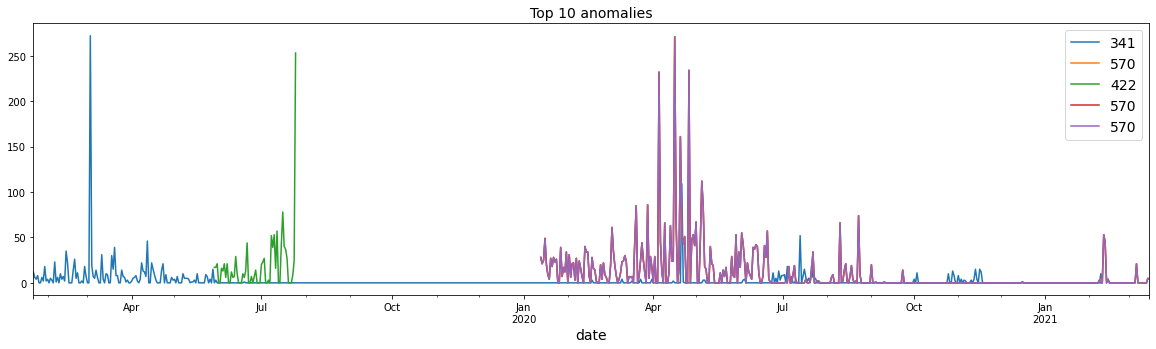

In [206]:
suspicios_ids(wd)

In [94]:
ts = df.set_index(df.date)

In [97]:
pages = ts['page'].resample('d').count()

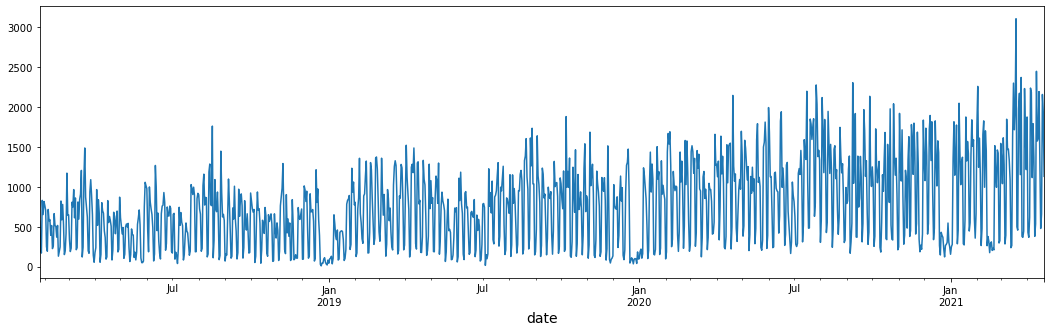

In [99]:
plt.figure(figsize=(18, 5))
pages.plot();

In [100]:
def compute_pct_b(pages_per_user: pd.Series, span: int, weight: float, user: int) -> pd.DataFrame:
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    
    Parameters:
        pages_per_user: pandas Series
            - contains information how many pages the user visited per time perido
        span: int 
            - number time periods(days, weeks etc) to compute exponential moving average
        weight: float
            - number of standrard deviations to compute anomalities
        user: int
            - user id
    
    Returns:
        Data Frame with following columns:
        pagers_per_user, midband, stdev, upper bound, lower bound, %b and user info
    '''
    # compute midband
    midband = pages_per_user.ewm(span=span).mean()

    # compute exponential stdev
    stdev = pages_per_user.ewm(span=span).std()

    # compute upper and lower bands
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.DataFrame({'pages':pages_per_user, 'midband':midband, 'stdev':stdev, 'ub':ub, 'lb':lb})
    # compute %b
    bb['pct_b'] = (bb['pages'] - bb['lb'])/(bb['ub'] - bb['lb'])
    bb['user'] = user
    return bb

In [109]:
def one_user_df_prep(df: pd.DataFrame, user: int) -> pd.Series:
    '''
    This function returns a Series consisting of data for only a single defined user
    
    Parameters:
        df: DataFrame with all logs and user id numbers
        user: user id number
    '''
    df = df[df.id == user].copy()
    df.date = pd.to_datetime(df.date)
    df = df.set_index(df.date)
    pages_one_user = df['page'].resample('d').count()
    return pages_one_user

In [101]:
def find_anomalies(df, user, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [110]:
anomalies = pd.DataFrame()
for u in list(ts.id.unique()):
    user_df = find_anomalies(ts, u, 30, 2)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [144]:
anomalies = anomalies.sort_values(by='pages', ascending=False)
users = anomalies.iloc[0:5].user

In [145]:
users

date
2020-07-22     11
2019-03-03    341
2020-04-16    570
2019-07-25    422
2020-04-26    570
Name: user, dtype: int64

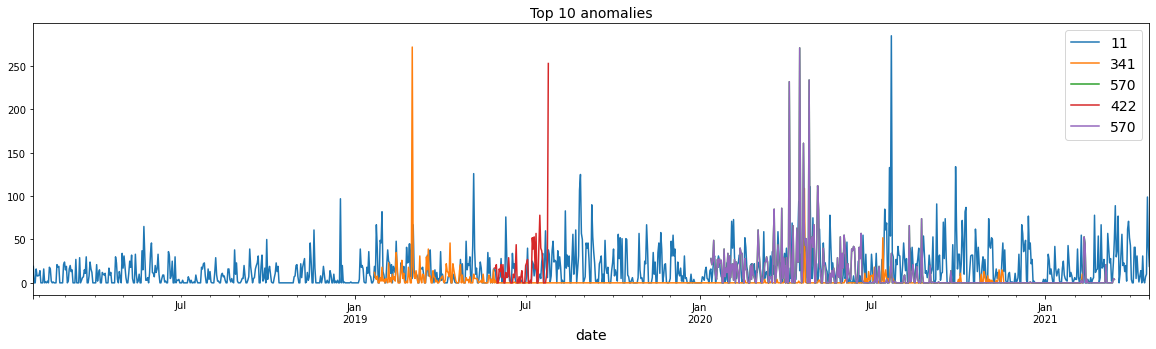

In [146]:
for u in users:
    suspicious_user = one_user_df_prep(df, u)
    suspicious_user.plot(figsize=(20,5), label=u)
    plt.title('Top 10 anomalies')
    plt.legend();

In [138]:
ts.loc['2020-07-22'][ts.loc['2020-07-22'].id==11].ip

date
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
                   ...      
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
2020-07-22    76.185.145.231
Name: ip, Length: 285, dtype: object

In [141]:
df[df.id==11].cohort_name.unique()

['Arches', 'Staff']
Categories (48, object): ['Andromeda', 'Apex', 'Apollo', 'Arches', ..., 'Wrangell', 'Xanadu', 'Yosemite', 'Zion']

##### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

In [223]:
def topic_reference_after(df):
    df0 = df[(df.date > df.end_date) & ~(df.full_lesson_name == 'index')]
    dfw = df0.loc[df0['field'] == 'WebDev']
    dfd = df0.loc[df0['field'] == 'DS']
    dfs = df0.loc[df0['field'] == 'Staff']
    df0.groupby('topic').page.count().sort_values(ascending=False).head()
    dfw.groupby('topic').page.count().sort_values(ascending=False).head()
    dfd.groupby('topic').page.count().sort_values(ascending=False).head()
    dfs.groupby('topic').page.count().sort_values(ascending=False).head()
    
    print('Data Science')
    display(dfd.topic.head(1))
    print()
    print('Web Dev')
    display(dfw.topic.head(1))
    print()

In [221]:
reference_after(df)

Data Science


443672    1-fundamentals
Name: topic, dtype: object


Web Dev


1    java-ii
Name: topic, dtype: object


Staff


166284    appendix
Name: topic, dtype: object

In [289]:
df[df.id == 570].cohort_name

428490    Fortuna
428647    Fortuna
428648    Fortuna
428681    Fortuna
428682    Fortuna
           ...   
846094    Fortuna
847269    Fortuna
847270    Fortuna
847271    Fortuna
847272    Fortuna
Name: cohort_name, Length: 4584, dtype: category
Categories (48, object): ['Andromeda', 'Apex', 'Apollo', 'Arches', ..., 'Wrangell', 'Xanadu', 'Yosemite', 'Zion']

##### 7. Which lessons are least accessed?

In [209]:
def get_bottom_lessons(df: pd.DataFrame, name:str='total', i:int=10, viz:bool=False):
    '''
    Finds least popular lessons in a dataframe
    Parameters:
        df: logs dataframe
        name: name of the dataframe
        i: number of rows to return
    Returns:
        data frame
    '''
    # series with groupby results
    s = df.groupby('full_lesson_name').page.count().sort_values(ascending=True).head(i)
    if viz:
        popular = s.reset_index()
        popular['field'] = name
    else:
        popular= s.reset_index().rename({'lesson':name, 'page':name+'_page'}, axis=1)
    return popular

In [229]:
get_bottom_lessons(wd, 'total', 50)

,full_lesson_name,total_page
0,.git,1
1,coding-challenges,1
2,codeupexercises,1
3,codeup-exercises,1
4,code-standards javascript,1
5,code-standards java,1
6,code-standards,1
7,cli-06-moving-files,1
8,classification scale_features_or_not.svg,1
9,classification overview,1
